# **CUSTOMER CHURN ANALYSIS**

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

### Background
Customer churn analysis in a telecommunication organization involves examining patterns and factors leading to customers discontinuing their services. 
By analyzing historical data, including customer demographics, usage patterns,service bills and service interactions, the organization can identify key indicators of churn. 

This analysis would help to predict future churns and develop targeted retention strategies to improve customer loyalty and reduce revenue loss. Leveraging advanced analytics and machine learning models,a company can gain insights into customer behavior, enhancing their ability to proactively address issues and enhance customer satisfaction.

### Objectives

- Understanding Churn Patterns
- Determine the features that have the most significant impact on customer churn.
- Develop a model to accurately predict the likelihood of customers churning.
 
### Hypothesis: 
This hypothesis is based on service usuage

**A. Rationale:**


**B. Null Hypothesis (H0):**
Null Hypothesis (H0): There is no significant difference in the churn rates between customers who use the service frequently and those who use it infrequently.


**C. Alternative Hypothesis (H1):**
Customers who use the service less frequently have a significantly higher churn rate compared to those who use it frequently.


### Key Business Questions

1. Are there specific demographic segments (Dependants, gender,SeniorCitizen,Partner) that exhibit a stronger correlation between service usage frequency and churn rates?

- This question delves into demographic analysis to understand if certain groups of customers are more sensitive to service usage frequency in terms of churn behavior, providing insights for targeted retention strategies.

2. What are the average customer lifetimes(tenure) , and how does it affect churn rate. 
- This question seeks to identify the relationship between customer's tenure to their churn rate

 3.  Which services are most associated with customer churn?
Examine the relationship between service usage (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) and churn.

4. .What is the relationship between monthly charges and customer churn rate, and how do different levels of monthly charges impact the likelihood of a customer churning in a telecommunication organization?

 5. What is the impact of total charges on customer churn rate?
- This question analyzes the relationship between  TotalCharges and churn to understand if customers who are charged more are more likely to churn


 



## Step 2: Data Understanding

The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)


#### Importing Libraries

In [187]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import re
import openpyxl
import calendar
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

## Machine learning packages
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [188]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [189]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [190]:
print (connection_string)

DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


In [191]:
# Creating a connection
connection = pyodbc.connect(connection_string)

In [192]:
# Accessing the data from the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

In [193]:
train_1 = pd.read_sql(query, connection)
train_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [194]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [195]:
train_2 = pd.read_csv(r"C:\Users\Josephine\Desktop\Career Accelerator\Customer-Churn-Analysis-ML-Prediction\data\LP2_Telco-churn-second-2000.csv")
train_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [196]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### Merging And Uploading Training Dataset

In [197]:
train_data = pd.concat([train_1, train_2], ignore_index=True)
train_data.to_csv("train_data.csv", index=False)

In [198]:
train_data=pd.read_csv("train_data.csv")

### Data Exploration/EDA
- Data Quality
- Data cleaning (Handiling missing values and Feature Engineering)
- Univariate Analysis
- Bivarate analysis/Multivariate... 
- Answering Analytica Questions


### Assesing Data Quality

In [199]:
train_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [200]:
train_data.shape
print("The Training dataset contains " ,train_data.shape[0], "rows and" , train_data.shape[1], "columns")

The Training dataset contains  5043 rows and 21 columns


In [201]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [202]:
train_data.duplicated().sum()
print("The training dataset has" ,train_data.duplicated().sum(),'duplicates')

The training dataset has 0 duplicates


In [203]:
# Checking for missing Values 
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

Investigating Missing Values

In [204]:

# Check for missing values
train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [205]:
# View the missing values of 651
train_data[train_data["OnlineSecurity"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.79998779296875,False
16,8191-XWSZG,Female,0,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.9500122070312,False
21,1680-VDCWW,Male,0,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.25,False
22,1066-JKSGK,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.149999618530273,True
33,7310-EGVHZ,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200000762939453,False


In [206]:
# View the missing values in Multiple lines(269)
train_data[train_data["MultipleLines"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
7,6713-OKOMC,Female,0,False,False,10,False,NaN,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.8999938964844,False
20,8779-QRDMV,Male,1,False,False,1,False,NaN,DSL,False,...,True,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650001525878906,True
27,8665-UTDHZ,Male,0,True,True,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200000762939453,True


In [207]:
# View the missing values i Total Charges
train_data[train_data["TotalCharges"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,True,True,0,False,NaN,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,0,False,True,0,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,0,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,0,True,True,0,True,True,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,0,True,True,0,False,NaN,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False


In [208]:
# View the missing values
train_data[train_data["Churn"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2988,6295-OSINB,Male,0,True,False,72,True,True,Fiber optic,True,...,True,False,True,True,Two year,True,Electronic check,109.650002,7880.25,NaN


- **Insights**
- Values with consistent missing values of 651 had no internet service and so would replace them with "No", since with no internet,these services cannot be provided. It could also be observed that internet services has no missing vales and so each value should correlate with it. 

- MultipleLines had most of the null values having no Phone services and so would replace the nan values with No

- The tenure for new customers are 0 because they have not completed their first month of subscription (pending total charge), hence the total charges becomes zero. We fill the missing values here with 0.

- Decide on removing or imputing the churn null value.
- Convert some columns into the right datatypes.

In [209]:
# Viewing unique values
train_data.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4870
Churn                  4
dtype: int64

In [210]:
# Looking into unique values
# List the Columns with True/False values
cat_columns = ["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

# Check 
all_cols = train_data.columns

# Dictionary to hold unique values for each category
uniques = {}

# Loop through each category and get unique values
for category in all_cols:
    uniques[category] = train_data[category].unique()

# Display unique values for each category
uniques

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'Partner': array(['True', 'False', 'No', 'Yes'], dtype=object),
 'Dependents': array(['False', 'True', 'No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39], dtype=int64),
 'PhoneService': array(['False', 'True', 'Yes', 'No'], dtype=object),
 'MultipleLines': array([nan, 'False', 'True', 'No', 'No phone service', 'Yes'],
       dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['False'

### Key Insights

- There are columns with boolean features having characters that are the same as the boolean characters such as (True, False: Yes, No, No phone service, No internet service)
- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that customers are using only one service

- There are columns with boolean features having characters that are the same as the boolean characters. These are= (True, False: Yes, No, No phone service, No internet service)

- All columns with 651 missing values have no internet service, therefore all services/features requiring internet connections are not available to them.

- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that these customers are using only one line of service.

- The single missing value in "Churn" can be filled with 0. 


- Some columns are not in their right data type

### Data Cleaning And Preparation

- Replace Categorical Columns with Yes,No values.
- Fill the missing values in the identified columns with 'No' .
- Remove missing value in "Churn" column since its just one missing value
- Convert some columns into the right datatypes.


In [211]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [212]:
# Change TotalCharges from object to float datatype
train_data.TotalCharges = pd.to_numeric(train_data.TotalCharges, errors='coerce')

In [213]:

# List the Columns with True/False values
bool_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

# Words to replace (using dictionary)
replacements = {False:"No","False":"No", "No phone service":'No', "No internet service":"No", "Yes":"Yes","True":"Yes"}

# Replace to unique value
train_data[bool_columns]= train_data[bool_columns].replace(replacements)

# Empty dictionary
special= {}

# Loop through each category and get unique values
for chars in bool_columns:
    special[chars] = train_data[chars].unique()

# Display unique values for each category
special

{'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array([nan, 'No', 'Yes'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', nan], dtype=object),
 'OnlineBackup': array(['Yes', 'No', nan], dtype=object),
 'DeviceProtection': array(['No', 'Yes', nan], dtype=object),
 'TechSupport': array(['No', 'Yes', nan], dtype=object),
 'StreamingTV': array(['No', 'Yes', nan], dtype=object),
 'StreamingMovies': array(['No', 'Yes', nan], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'Churn': array(['No', 'Yes', nan], dtype=object)}

In [214]:
train_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [215]:
# Replace with your actual file path
# df_test = pd.read_excel(r"C:\Users\Josephine\Desktop\Career Accelerator\Customer-Churn-Analysis-ML-Prediction\data\Telco-churn-testing_data-2000.xlsx")

#df_test 

### Handling Missing Values

In [216]:
# Check for missing values
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [217]:
# Select and fill the necessary boolean columns with "False" value
sliced_data= train_data.iloc[:,:-3].fillna("No")
sliced_data.isna().sum()

# Update the columns in the original DataFrame with the filled data in sliced_data
train_data.loc[sliced_data.index, sliced_data.columns]= sliced_data
train_data.isna().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

In [218]:
train_data['TotalCharges'].fillna(0, inplace=True)
train_data['Churn'].fillna('No', inplace=True)

In [219]:
train_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [220]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


### Statistical Analysis

In [221]:
# Descriptive Statistics of numeric values 
# EDA region

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775000,70.550003,90.050003,118.650002
TotalCharges,5043.0,2298.410966,2269.532701,0.0,415.724997,1398.599976,3857.575073,8670.100000


- ***Findings***
- The SeniorCitizen is a categorical data but is fillled with 0s and 1s. hence the output.
- The average tenure of customers is approximately 32 months (2 and half yrs).
- The tenure ranges from 0 to 72 months, indicating the presence of new customers and customers who've been with the company for 6 years.
- The average monthly charge is approximately $65.
- The average Total charge is $2,297 whereas the median value is $1,398 indicating the prescence of outliers.
- Some customers having very high total charges likely due to long tenure and higher monthly expenses

In [222]:
train_data.describe(include= "object").T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,2,No,2913
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,2,No,3587
OnlineBackup,5043,2,No,3311
DeviceProtection,5043,2,No,3299


### Visualizing The Data

i. **Univariate Analysis** 

This would focuse on examining individual variables to understand their distributions and relationships with churn. 


In [223]:
# Finding the value counts in the Churn colunm
value_counts= train_data["Churn"].value_counts()
value_counts

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [224]:
# Finding the perentage Churned
percentages = value_counts /value_counts.sum() * 100
percentages

Churn
No     73.507833
Yes    26.492167
Name: count, dtype: float64

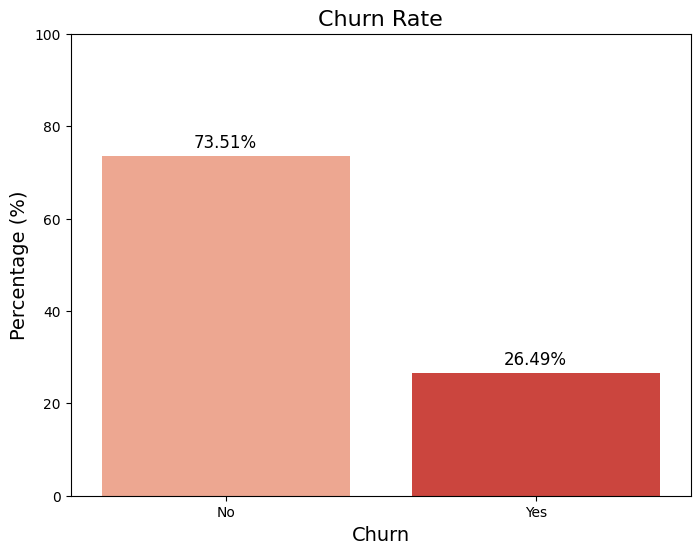

In [225]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette='Reds')

# Adding titles and labels
plt.title('Churn Rate', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)

# Displaying the percentage values on top of the bars
for i, percentage in enumerate(percentages.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

- For the Target Variable "Churn", 73.51% of customers would not Churn and only 26.49% would churn. 
- This makes the data Unbalanced

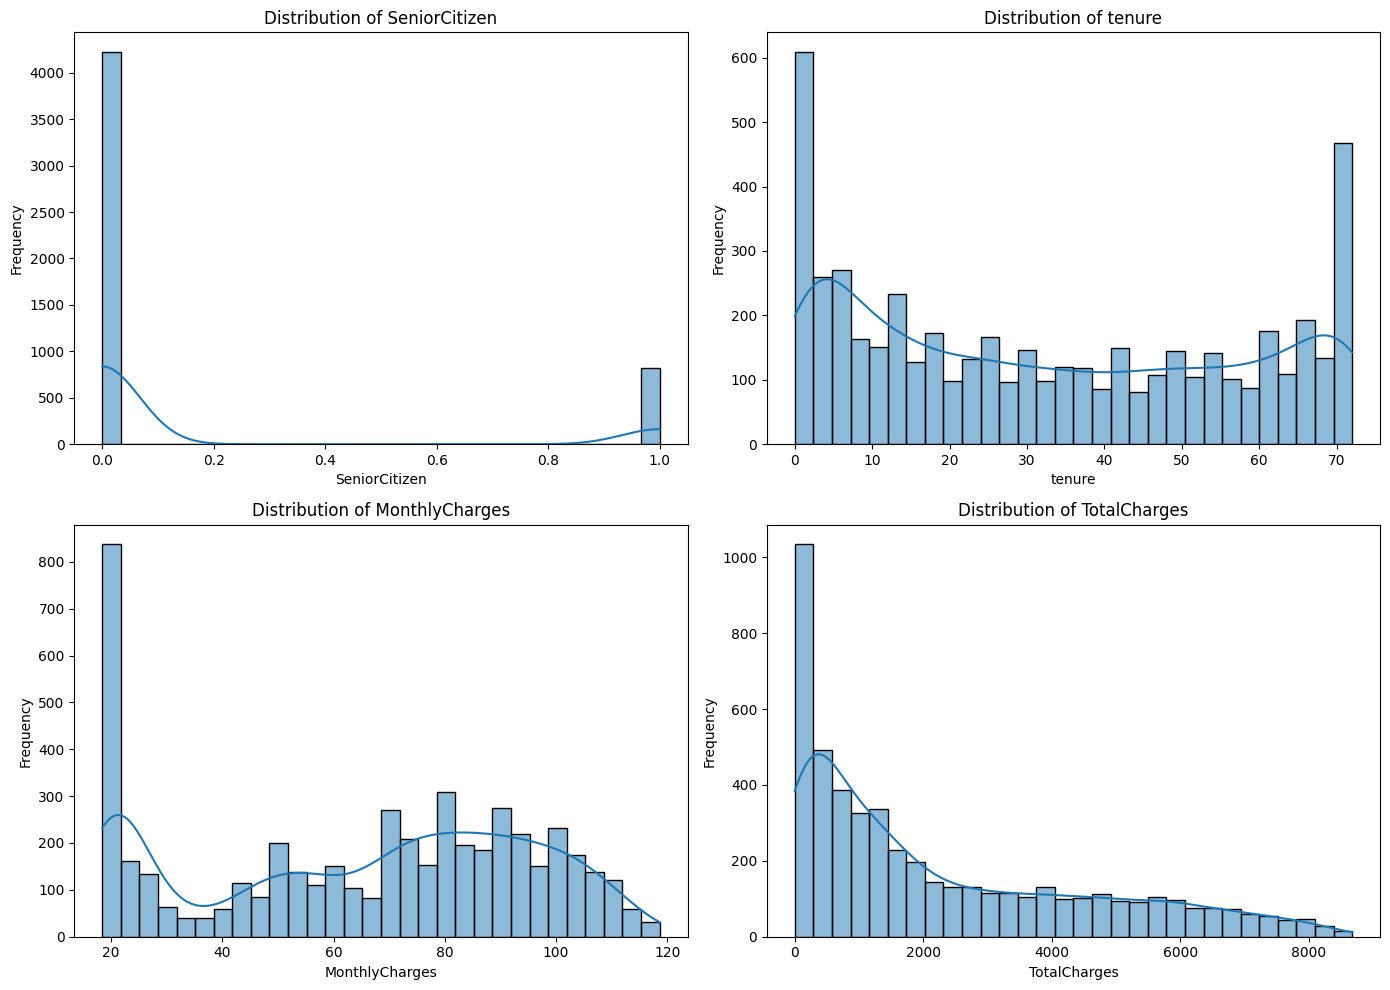

In [226]:
# Find Individual Distribution of numerical Columns
num_columns= ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

fig,axes,= plt.subplots(nrows=2,ncols=2, figsize=(14, 10))
axes =axes.flatten()

for idx,col in enumerate(num_columns):
    sns.histplot(train_data[col], kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

**Insights**


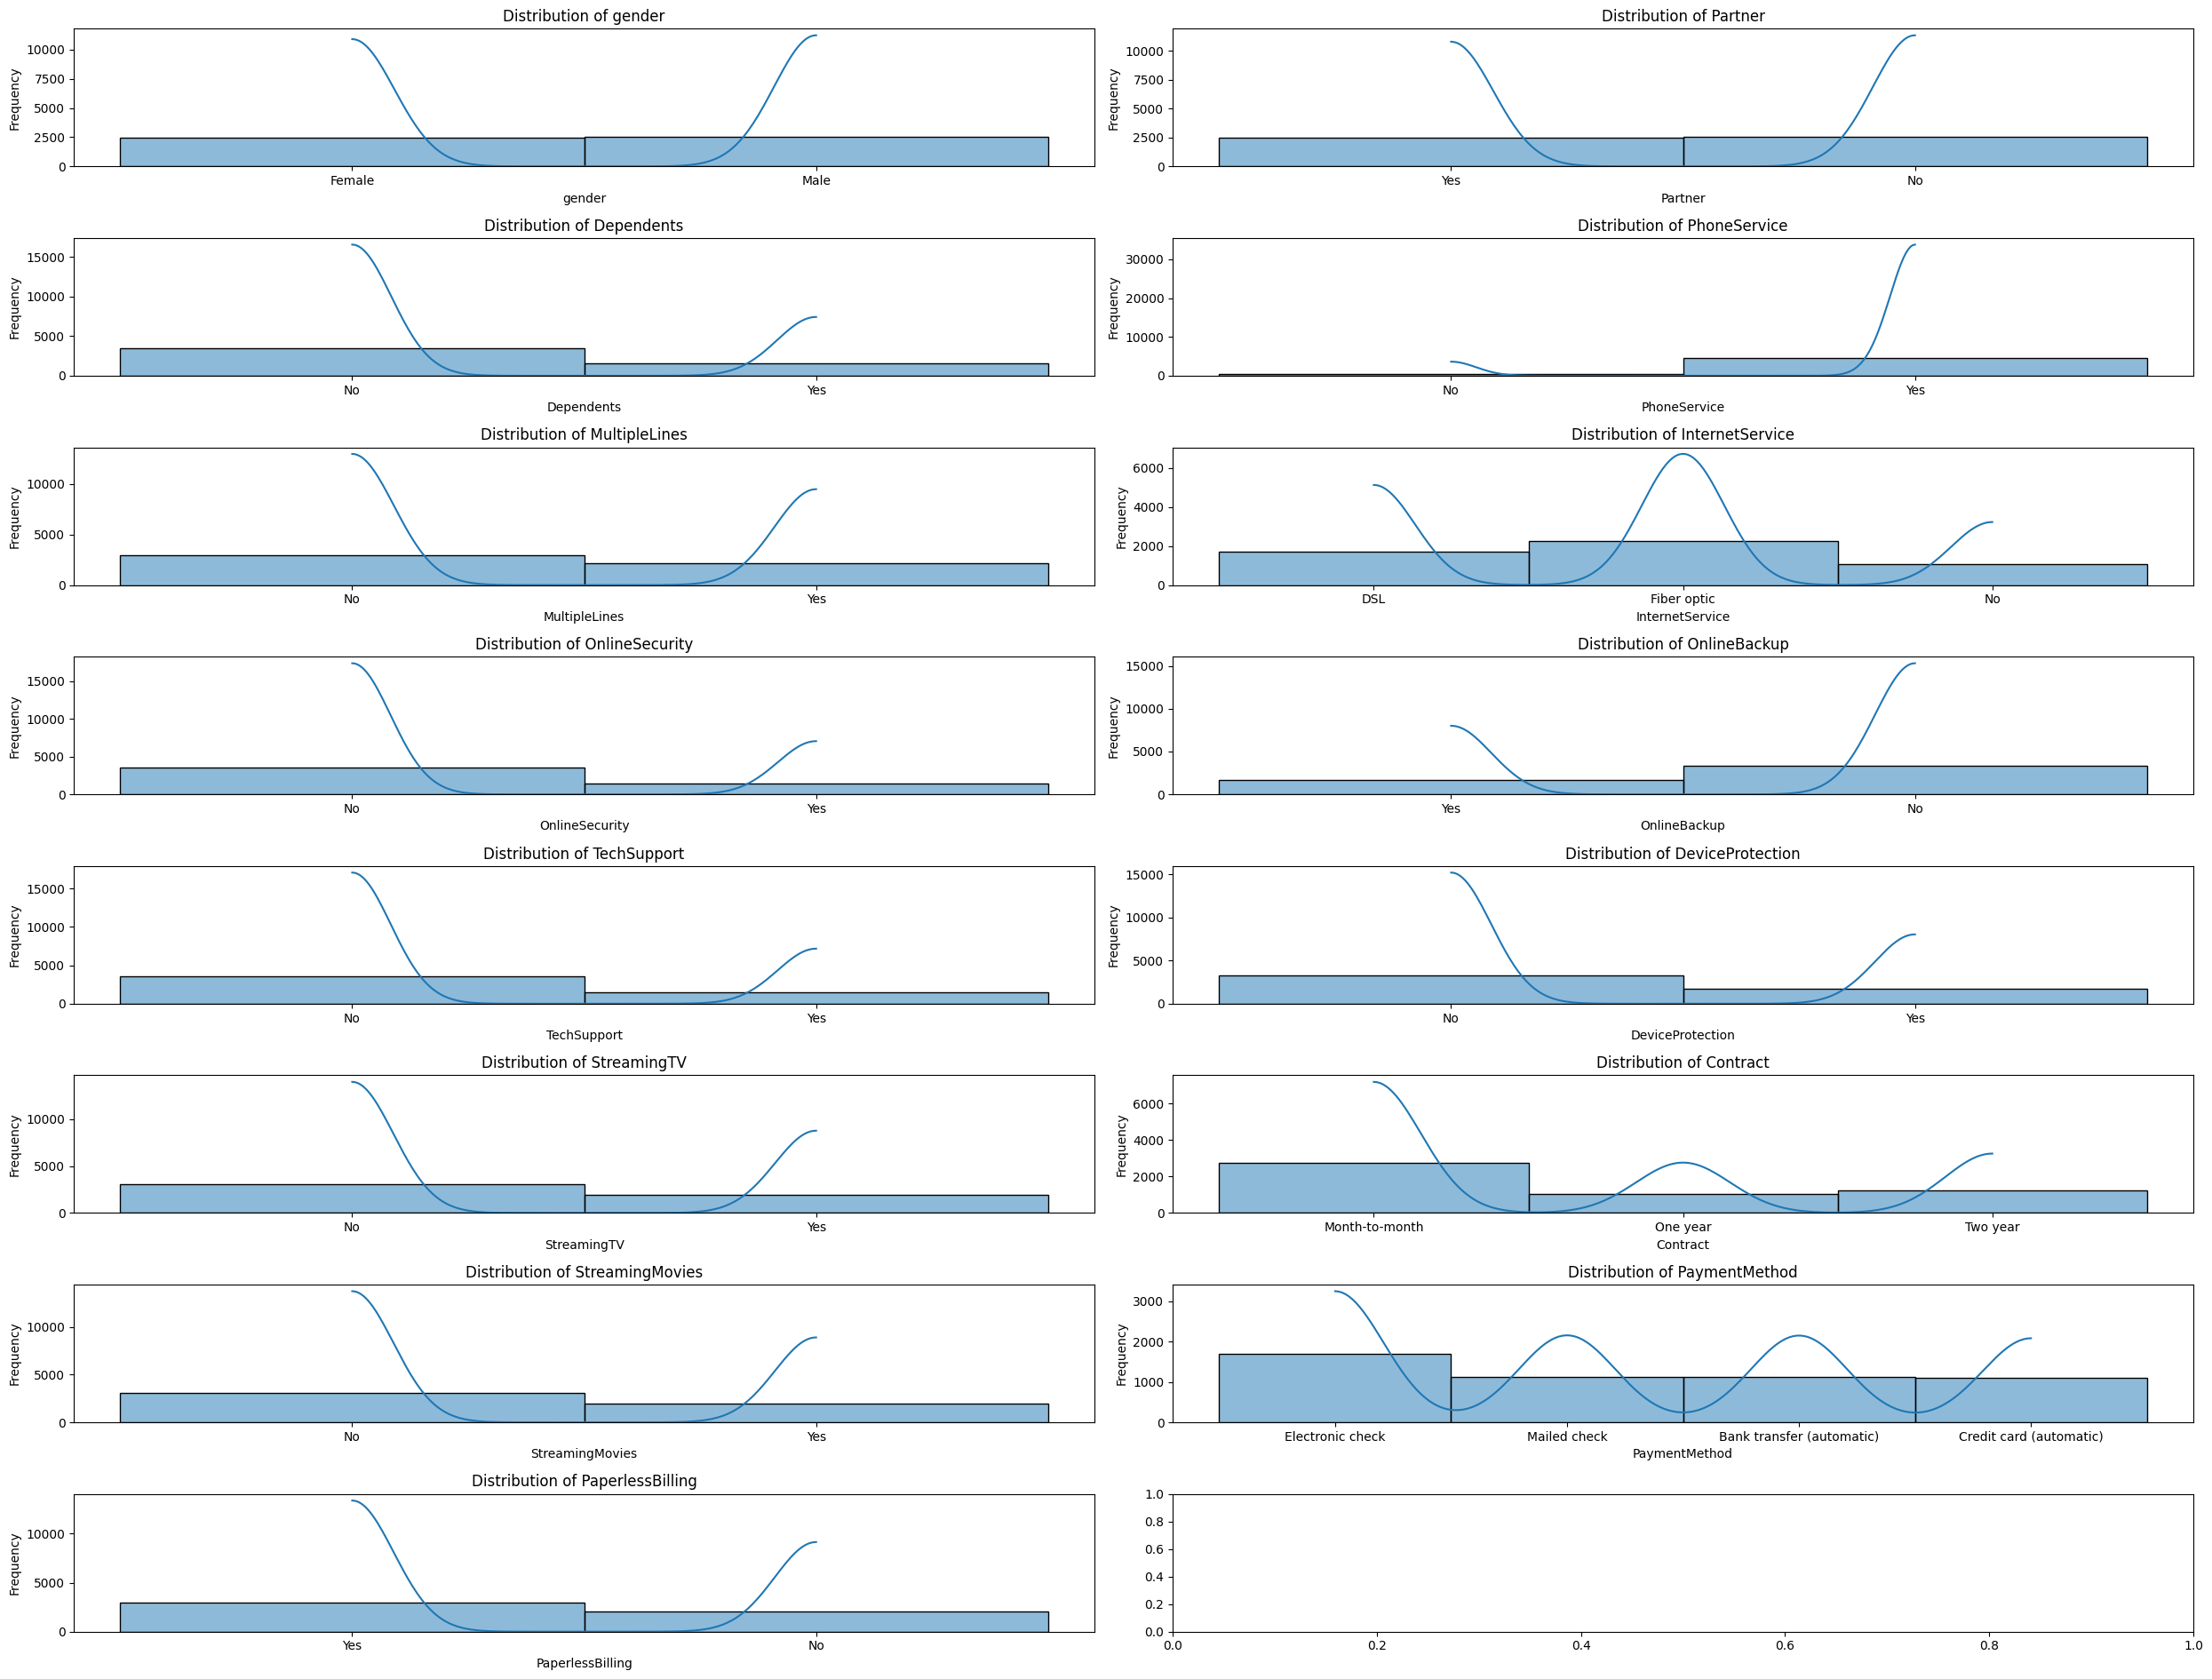

In [227]:
# Find Individual Disribution of Categorical Colunms
cat_columns= ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','Contract','StreamingMovies','PaymentMethod','PaperlessBilling']

fig,axes,= plt.subplots(nrows=8,ncols=2, figsize=(25, 19))
axes =axes.flatten()

for idx,col in enumerate(cat_columns):
    sns.histplot(train_data[col], kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

**Inferences** 

### Bivarite Analysis
- show the impact of the individual variables to the churn behavior of customers in histogram 
- find the relationship between categorical values and the target value, Churn
- find the relationship between  Numeric values against the target,'Churn'
-Compare monthly Charges with totalCharges
- TotalCharges vrs churn
- Montly Charges vrs Churn
- Tenure vrs Churn rate

- Relationship between Monthly Charges and Total Charges

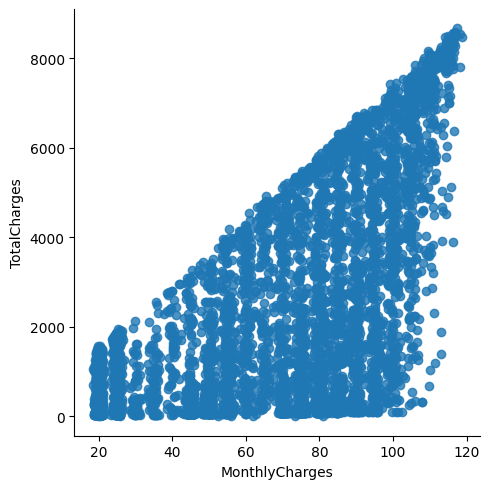

In [228]:
sns.lmplot(data=train_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

- This scater plot shows the relationship between TotalCharges on the y-axis and Monthly Charges on the X-axis. Theres a positive correlation which is, as MonthlyCharges increases the Total Charges increase .

Text(0.5, 1.0, 'Monthly charges by churn')

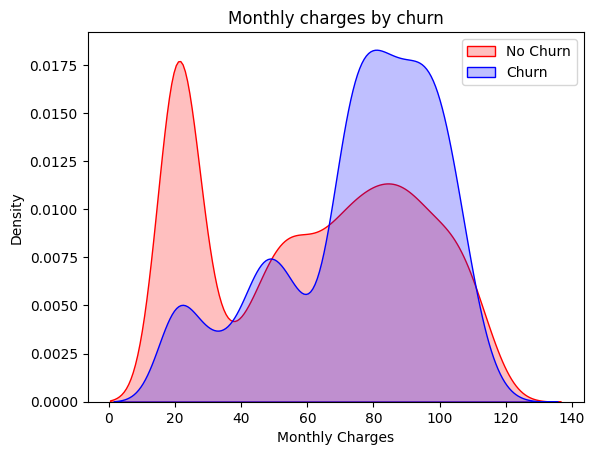

In [229]:
# Churn by Monthly Charges

Mth = sns.kdeplot(train_data.MonthlyCharges[(train_data["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(train_data.MonthlyCharges[(train_data["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

- Inference:We see a high churn rate when MonthlyCharges are high.$(60- 120) 

Text(0.5, 1.0, 'Total charges by churn')

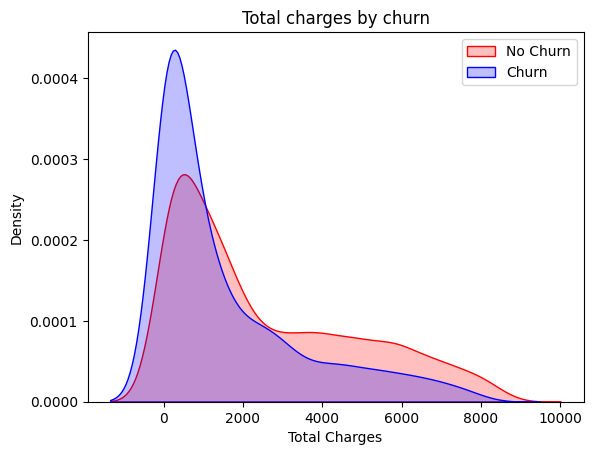

In [230]:
# Checking for correlation with TotalCharges with Churn
Tot = sns.kdeplot(train_data.TotalCharges[(train_data["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(train_data.TotalCharges[(train_data["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

 **Insight:** There is higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :-
 Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors, Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

In [231]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
train_data['tenure_group'] = pd.cut(train_data['tenure'], bins=range(1, 80, 12), right=False, labels=labels)

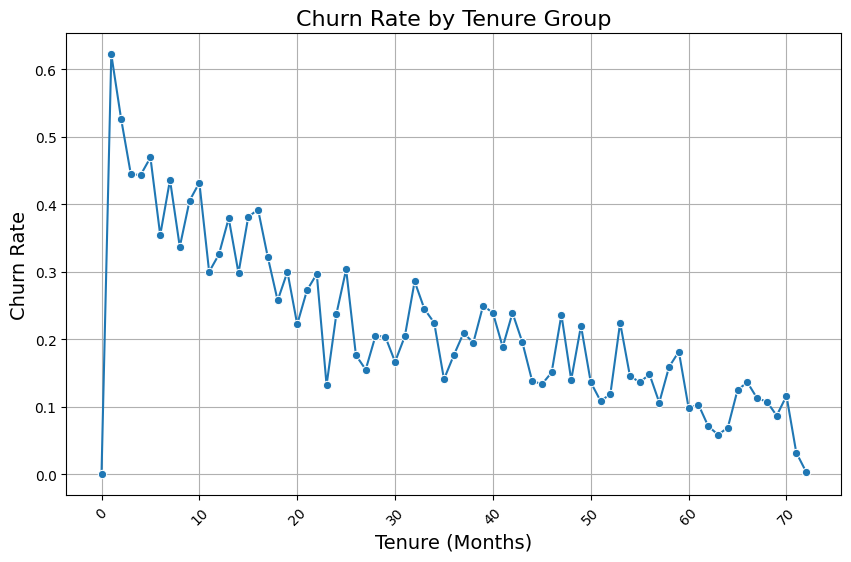

In [232]:
# Ensure 'Churn' is numeric
train_data['Churn'] = train_data['Churn'].map({'Yes': 1, 'No': 0})
# Calculate churn rate for each tenure group
churn_rate = train_data.groupby('tenure')['Churn'].mean().reset_index()


# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='Churn', data=churn_rate, marker='o')
plt.title('Churn Rate by Tenure Group', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

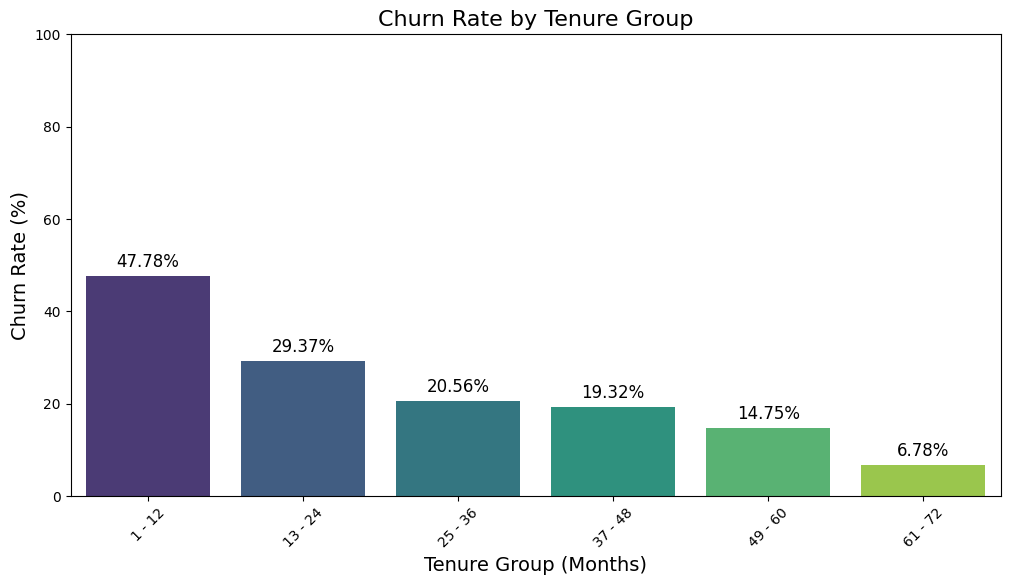

In [233]:


# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
train_data['tenure_group'] = pd.cut(train_data.tenure, bins=range(1, 80, 12), right=False, labels=labels)

# Calculate churn rate for each tenure group
churn_rate = train_data.groupby('tenure_group')['Churn'].mean().reset_index()
churn_rate['Churn'] = churn_rate['Churn'] * 100  # Convert to percentage

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='tenure_group', y='Churn', data=churn_rate, palette='viridis')

# Adding titles and labels
plt.title('Churn Rate by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group (Months)', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Annotate percentages on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# Show the plot
plt.show()


**Inference**
- Customers have a hugh churn rate at a 47.78% in the first year of service, but rather low churn rate with longer tenures.

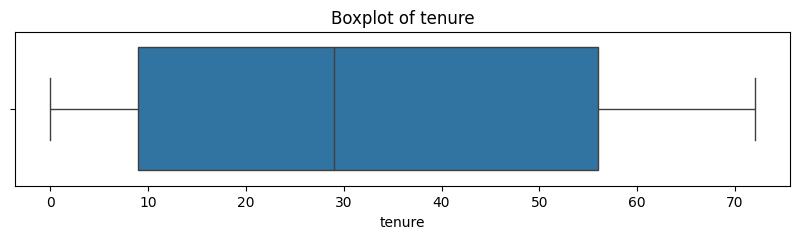

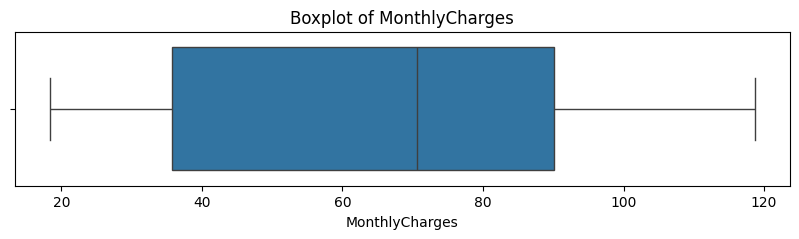

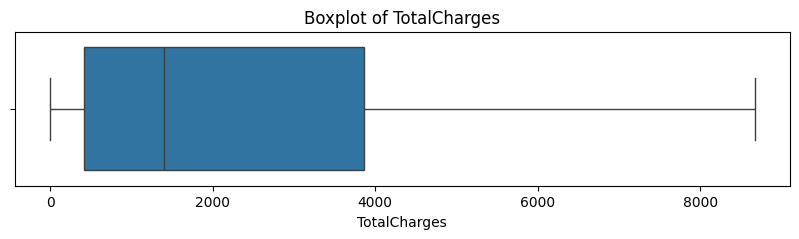

In [234]:
# Checking Outliers
# Specifying numerical columns
numerical_cols = train_data[["tenure","MonthlyCharges","TotalCharges"]]

for column in numerical_cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=column, orient="h", data=train_data)
    plt.title(f'Boxplot of {column}')
    plt.show()

Inference: There are no  obvious Outliers

III. Multivariate Analysis

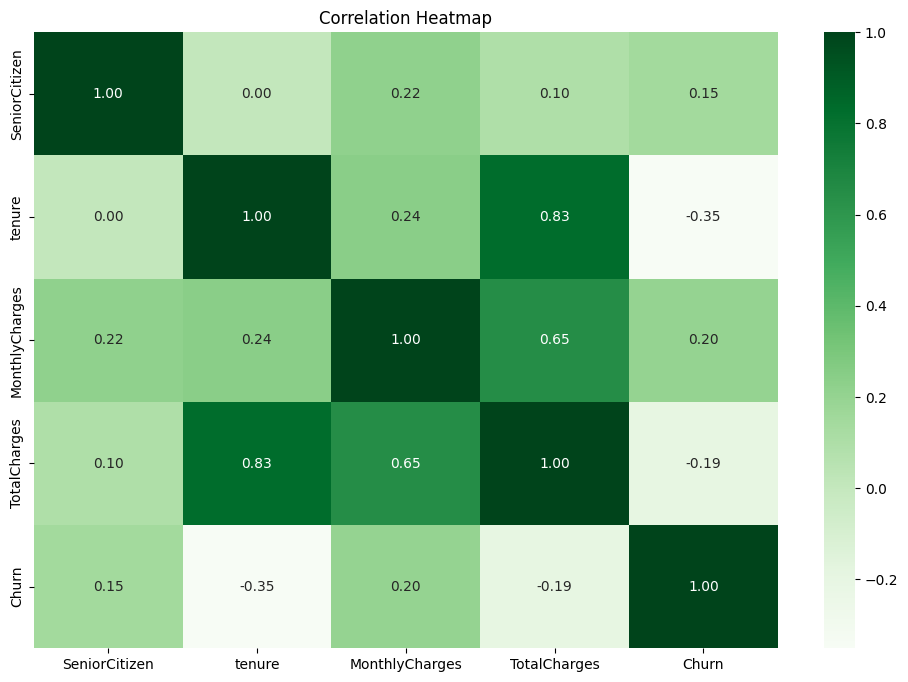

In [235]:
# Generate the correlation matrix, excluding non-numeric columns
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Key Insights:

- In the tenure range, there are high frequencies at the beginning (0-10 months) and at the end (60-70 months). This might indicate that customers tend to either leave the service within the first year or stay loyal for a long period.
- The right skewed distribution of the "MonthlyCharges" indicate that most customers are paying relatively low monthly charges, but there is a significant number of customers with higher monthly charges.
- The right skewness of the "TotalCharges" towards lower charges could be due to the high number of new customers.
- Customers with low total charges might be those who have recently joined, while those with higher total charges are likely to be long-term customers

Grouping the tenure in Yearly sets.

In [236]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

train_data['tenure_group'] = pd.cut(train_data.tenure, range(1, 80, 12), right=False, labels=labels)
train_data['tenure_group'].value_counts()

tenure_group
1 - 12     1534
61 - 72    1017
13 - 24     732
25 - 36     603
49 - 60     590
37 - 48     559
Name: count, dtype: int64

for i, predictor in enumerate(train_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','customerID'])):
    plt.figure(i)
    sns.countplot(data=train_data, x=predictor, hue='Churn')

### Answering Analytical Questions

1.  Are there specific demographic segments (Dependants, gender,SeniorCitizen,Partner) that exhibit a stronger correlation between service usage frequency and churn rates? 

In [237]:
from scipy.stats import chi2_contingency
# Select relevant columns
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for each pair with 'Churn'
cramers_v_values = {}
for column in demographic_columns[:-1]:  # Exclude 'Churn' itself
    cramers_v_values[column] = cramers_v(train_data[column], train_data['Churn'])

# Convert the dictionary to a DataFrame for better readability
cramers_v_df = pd.DataFrame(list(cramers_v_values.items()), columns=['Demographic Factor', 'Cramer\'s V'])

print(cramers_v_df)

  Demographic Factor  Cramer's V
0             gender    0.000000
1      SeniorCitizen    0.148632
2            Partner    0.140159
3         Dependents    0.170547


**Inference**
Based on the Cramer's V values for the demographic factors in relation to customer churn, we can make the following inferences:
-  'Senior Citizen,' 'Partner,' and 'Dependents' have weak associations and hence have a slight impact on customer churn behaviour.
On the other hand, 'gender' does not influence the likelihood of a customer churning.


Q2. Are there specific demographic segments (Dependants, gender,SeniorCitizen,Partner) that exhibit a stronger correlation between service usage frequency and churn rates?


Q3.  Which services are most associated with customer churn?
Examine the relationship between service usage (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) and churn.

Q4. .What is the relationship between monthly charges and customer churn rate, and how do different levels of monthly charges impact the likelihood of a customer churning in a telecommunication organization?


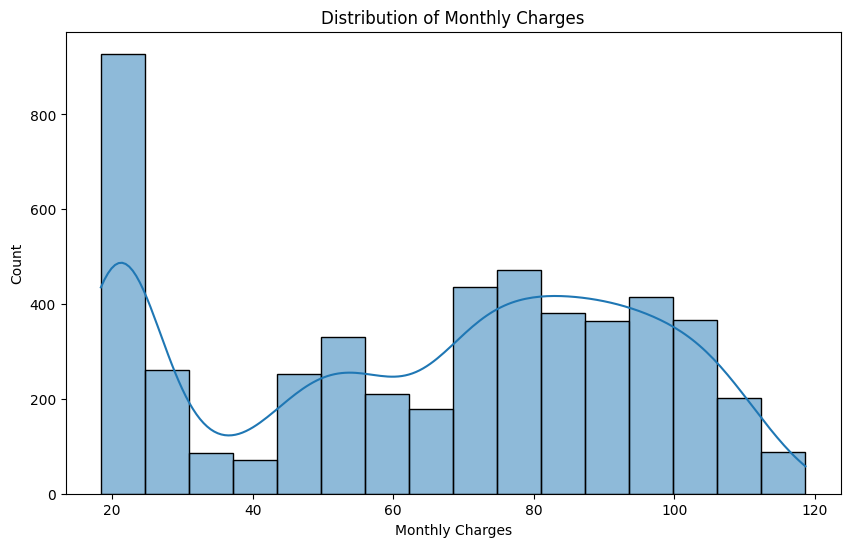

In [238]:
# Analyze the distribution of monthly charges
plt.figure(figsize=(10, 6))
sns.histplot(train_data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

Q5. What is the impact of total charges on customer churn rate?
- This question analyzes the relationship between  TotalCharges and churn to understand if customers who are charged more are more likely to churn

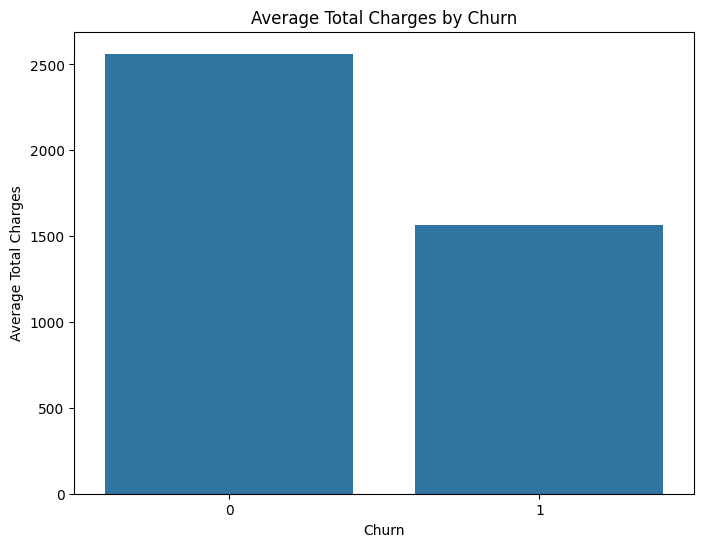

In [239]:
# Convert 'TotalCharges' to numeric if needed
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')

# Calculate average TotalCharges for each churn category
avg_total_charges = train_data.groupby('Churn')['TotalCharges'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='TotalCharges', data=avg_total_charges)
plt.title('Average Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Total Charges')
plt.show()

- Customers with high total Charges are less likely to churn. May be due to long turner or more service subscription

### Testing Hypothesis
Customers with longer turners are less likely to churn


In [276]:
from scipy.stats import chi2_contingency
# Create a contingency_table
contingency_table = pd.crosstab(train_data['tenure_group'], train_data['Churn'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: (chi2_stat)")
print(f'p_val: {p_val}')


# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is significant association between tenure group and churn rate.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between tenure group and churn")
 

Contingency Table:
Churn           0    1
tenure_group          
1 - 12        801  733
13 - 24       517  215
25 - 36       479  124
37 - 48       451  108
49 - 60       503   87
61 - 72       948   69
Chi-square Statistic: (chi2_stat)
p_val: 7.177339031483024e-134
Reject the null hypothesis: There is significant association between tenure group and churn rate.


###  Data Preparation and Modelling
We would be going through at least 4 different models and pick the one that best fits
Examples of Classification models to try out are;
- XGBOOST
- RANDOM FOREST
- KNN

- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)
- Gradient Boosting (e.g., XGBoost, LightGBM)

Split Data into Numeric and Categorical Columns

In [240]:
X = train_data.drop(['Churn', 'tenure_group', 'customerID'], axis=1)
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [241]:
y= train_data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [242]:
y.unique()

array([0, 1], dtype=int64)

In [243]:
num_cols= X.select_dtypes(include=['Int64','float']).columns
num_cols= num_cols.drop('SeniorCitizen')
num_cols= X.select_dtypes('number').columns
num_cols


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [244]:
cat_cols= X.select_dtypes('object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [246]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)
X_train, X_test, y_train, y_test

(      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 2175  Female              0      No         No      30          Yes   
 4022  Female              0      No         No      20          Yes   
 1460    Male              0      No         No       5          Yes   
 2322  Female              0      No        Yes      49          Yes   
 2349    Male              0     Yes        Yes      72          Yes   
 ...      ...            ...     ...        ...     ...          ...   
 3282  Female              0     Yes         No       3          Yes   
 3432  Female              0      No         No       2          Yes   
 3019    Male              1      No         No      14          Yes   
 2876    Male              0      No         No      19          Yes   
 31      Male              1     Yes         No       2          Yes   
 
      MultipleLines InternetService OnlineSecurity OnlineBackup  \
 2175            No     Fiber optic             No           No   


In [247]:
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((4034, 19), (4034,)), ((1009, 19), (1009,)))

### Encoding

In [265]:
encoder = LabelEncoder()
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [249]:
X.select_dtypes('number').skew()

SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.945710
dtype: float64

- Because the target variable is already in 0s and 1s we will skip this step.
encoder= LabelEncoder()
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### Pipelines

In [266]:
from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming you have defined `Categoric_pipeline` and `cat_cols` correctly
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Creating Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combining the pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])


In [251]:
# 
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [252]:
# Show the training data class before and after balancing
print('Before balance')
count_before = pd.value_counts(y)
percentage_before = (count_before / count_before.sum()) * 100
for label, count in count_before.items():
    print(f'{label}: {count} ({percentage_before[label]:.2f}%)')

Before balance
0: 3707 (73.51%)
1: 1336 (26.49%)


#### The above shows an unbalanced data.

### Modeling And Evaluation

In [253]:
models= [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state =42)),
    ('KNN', KNeighborsClassifier())
]


In [254]:
unbalanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline ={}

In [255]:


# Run the training data through the models
for model_name, classifier in models:

    pipeline= Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_test)
    
    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print("=" *50)
    

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       742
           1       0.45      0.51      0.48       267

    accuracy                           0.71      1009
   macro avg       0.63      0.64      0.64      1009
weighted avg       0.72      0.71      0.71      1009

SVC
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       742
           1       0.64      0.54      0.58       267

    accuracy                           0.80      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.79      0.80      0.79      1009

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       742
           1       0.64      0.54      0.59       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.7

In [256]:
unbalanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline ={}

for model_name, classifier in models:

    pipeline= Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    unbalanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']

    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

unbalanced_table.sort_values(by="F1_Score", ascending=False)

,Models,Accuracy,Precision,Recall,F1_Score
3,Logistic Regression,0.799802,0.795386,0.799802,0.797238
2,Random Forest,0.798811,0.790268,0.798811,0.792834
1,SVC,0.795837,0.787251,0.795837,0.789933
4,KNN,0.748266,0.746474,0.748266,0.747342
0,Decision Tree,0.707631,0.719467,0.707631,0.712815


Balanced Data (SMOTE)

In [257]:
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif


In [258]:
balanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline ={}

for model_name, classifier in models:

    pipeline= imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over-sampler', SMOTE(random_state=42)),
        ('feature_selection', SelectKBest(mutual_info_classif,k = 'all')),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    balanced_pipeline[model_name] = pipeline
    y_pred = pipeline.predict(X_test)

    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']


    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]

balanced_table.sort_values(by="F1_Score", ascending=False)

,Models,Accuracy,Precision,Recall,F1_Score
2,Random Forest,0.781962,0.785213,0.781962,0.783470
1,SVC,0.766105,0.792865,0.766105,0.774679
3,Logistic Regression,0.742319,0.808770,0.742319,0.756584
0,Decision Tree,0.733399,0.747956,0.733399,0.739356
4,KNN,0.684836,0.756092,0.684836,0.702432


#### Visualising ROC Curve

In [ ]:
balanced_pipeline

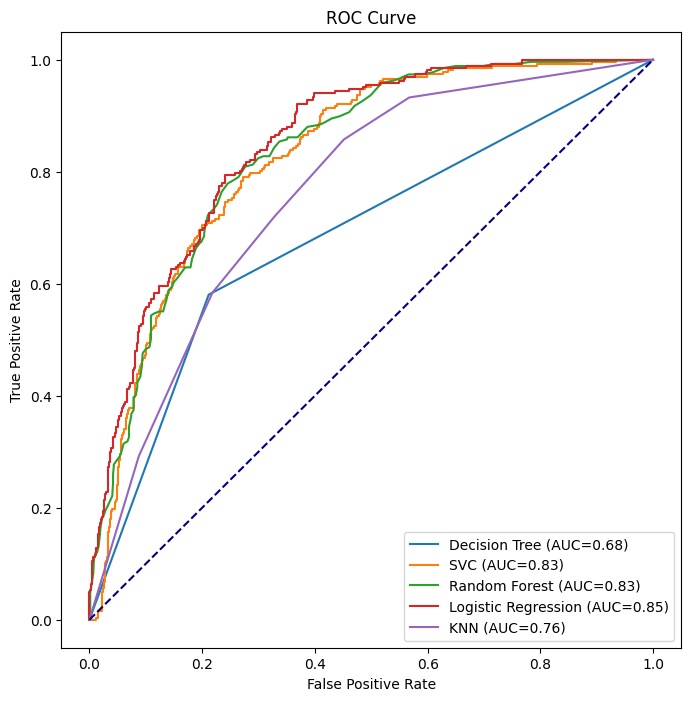

In [260]:
# Plotting the ROC Curve for model Performance
roc_curve_data = {}
fig, ax = plt.subplots(figsize=(8, 8))  

for model_name, pipeline in balanced_pipeline.items():
    y_score = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)  # Moved inside the loop
    roc_auc = auc(fpr, tpr)
    
    roc_curve_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Threshold': thresholds,
    })
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.2f})')
    
# Plot the diagonal line
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')

plt.show()


### Inference On Model Performance
### Analysis

1. **Random Forest**:

   - **Best Performance**: The Random Forest model achieved the highest accuracy (0.781962) and a high F1 Score (0.783470), indicating a good balance between precision and recall.
   - **Strength**: It is particularly strong in managing the balance between false positives and false negatives.

2. **SVC (Support Vector Classifier)**:

   - **High Precision**: This model has the highest precision (0.792865), meaning it is very good at minimizing false positives.
   - **Trade-Off**: Although its accuracy (0.766105) is slightly lower than the Random Forest, it still performs well in identifying the relevant cases correctly.

3. **Logistic Regression**:

   - **High Precision but Lower Recall**: Logistic Regression has the highest precision (0.808770) among all models but slightly lower recall (0.742319). This indicates it is good at correctly identifying positive instances but might miss some positive instances.
   - **Overall Performance**: With an F1 Score of 0.756584, it still provides a reasonable balance between precision and recall.

4. **Decision Tree**:
   - **Balanced but Lower Accuracy**: The Decision Tree model has an accuracy of 0.733399 and an F1 Score of 0.739356. It performs adequately but does not excel in any specific metric compared to the top models.
   - **Use Case**: It might be useful in scenarios where interpretability and simplicity are more important than raw performance.

5. **K-Nearest Neighbors (KNN)**:
   - **Lowest Performance**: The KNN model has the lowest accuracy (0.684836) and F1 Score (0.702432), indicating it struggles to classify instances correctly compared to the other models.
   - **Considerations**: This model may need more tuning or might not be well-suited for this specific dataset.

### Conclusion
- **Best Overall Model**: The Random Forest model stands out as the best performer overall due to its balance between precision, recall, and accuracy.
- **High Precision Model**: For scenarios where minimizing false positives is critical, the Logistic Regression model might be preferred due to its high precision.
- **General Recommendation**: Depending on the specific application and the importance of different metrics, Random Forest and SVC are strong candidates for deployment, with Logistic Regression also being a viable option for precision-critical tasks.

### Hyperparameter Tuning

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Custom scoring metric
f1_scorer = make_scorer(f1_score)

Defining Models And Hyperparametr Grid

In [268]:
# Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# SVC
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(probability=True, random_state=42))])

svc_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Logistic Regression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(random_state=42))])

lr_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Decision Tree
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier(random_state=42))])

dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# K-Nearest Neighbors
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}


Perform Hyperparamater Tuning

In [269]:
# Function to perform Grid Search
def perform_grid_search(pipeline, param_grid):
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

# Random Forest
rf_best_params, rf_best_score = perform_grid_search(rf, rf_param_grid)
print("Best parameters for Random Forest:", rf_best_params)
print("Best F1 Score for Random Forest:", rf_best_score)

# SVC
svc_best_params, svc_best_score = perform_grid_search(svc, svc_param_grid)
print("Best parameters for SVC:", svc_best_params)
print("Best F1 Score for SVC:", svc_best_score)

# Logistic Regression
lr_best_params, lr_best_score = perform_grid_search(lr, lr_param_grid)
print("Best parameters for Logistic Regression:", lr_best_params)
print("Best F1 Score for Logistic Regression:", lr_best_score)

# Decision Tree
dt_best_params, dt_best_score = perform_grid_search(dt, dt_param_grid)
print("Best parameters for Decision Tree:", dt_best_params)
print("Best F1 Score for Decision Tree:", dt_best_score)

# KNN
knn_best_params, knn_best_score = perform_grid_search(knn, knn_param_grid)
print("Best parameters for KNN:", knn_best_params)
print("Best F1 Score for KNN:", knn_best_score)


Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 Score for Random Forest: 0.5913985991149875
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best F1 Score for SVC: 0.5919063764683077
Best parameters for Logistic Regression: {'classifier__C': 100, 'classifier__solver': 'liblinear'}
Best F1 Score for Logistic Regression: 0.600994227134127
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best F1 Score for Decision Tree: 0.5230076958920493
Best parameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best F1 Score for KNN: 0.5910887055091796
